In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

CALCULO DEL FIN DE LA INFLACION CON T-MODEL

In [ ]:
#Constants
lambdam=1
Mp=1
#Potenial
def V(phi):
    return lambdam * Mp**4 * (np.sqrt(6) * np.tanh(phi / (np.sqrt(6) * Mp)))**6

def DV(phi):
    return 6 * lambdam * Mp**3 * (np.sqrt(6) * np.tanh(phi / (np.sqrt(6) * Mp)))**5 *(1-np.tanh(phi / (np.sqrt(6) * Mp))**2)

def D2V(phi):
    u = phi / (np.sqrt(6) * Mp)
    tanh_u = np.tanh(u)
    term1 = 5 * (tanh_u**4)
    term2 = 7 * (tanh_u**6)

    return 216* lambdam * Mp**2 *(1-tanh_u**2)* (term1 - term2)
#Background equation
def system(t,y):
    phi,pi=y
    dphi_dt=pi
    dpi_dt=-3*np.sqrt((((pi**2)/2 +V(phi))/(3*Mp**2)))*pi-DV(phi)
    return [dphi_dt,dpi_dt]

--- Primera Intersección ---
Tiempo de intersección (t): 2.416661
Valor de phi_sol en la intersección: 1.982993
Valor de pi_sol en la intersección: -4.408441
Verificación: pi_sol**2 = 19.434354
Verificación: V(phi_sol) = 19.424492


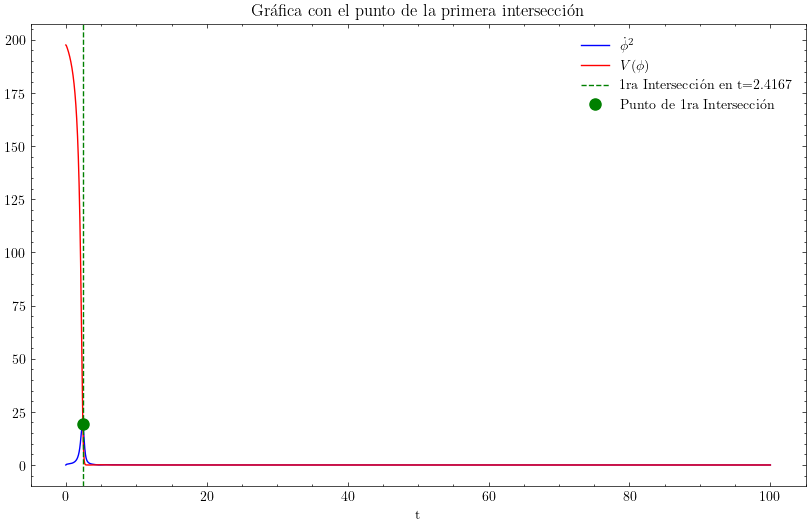

In [ ]:
phi_0=6
pi_0=0
y_0=[phi_0,pi_0]
t_span=(0,100)
t_eval=np.linspace(t_span[0],t_span[1],10000)
#Background Solution
sol=solve_ivp(system,t_span, y0=y_0, t_eval=t_eval)
t=sol.t
phi_sol=sol.y[0]
pi_sol=sol.y[1]
# End of the inflation
difference = pi_sol**2 - V(phi_sol)
zero_crossings_indices = np.where(np.diff(np.sign(difference)))[0]
if len(zero_crossings_indices) > 0:
    idx = zero_crossings_indices[0]
    t1, t2 = t[idx], t[idx+1]
    diff1, diff2 = difference[idx], difference[idx+1]
    t_interseccion = t1 - diff1 * (t2 - t1) / (diff2 - diff1)
    phi1, phi2 = phi_sol[idx], phi_sol[idx+1]
    pi1, pi2 = pi_sol[idx], pi_sol[idx+1]
    phi_at_interseccion = phi1 + (phi2 - phi1) * (t_interseccion - t1) / (t2 - t1)
    pi_at_interseccion = pi1 + (pi2 - pi1) * (t_interseccion - t1) / (t2 - t1)
    print(f"--- Primera Intersección ---")
    print(f"Tiempo de intersección (t): {t_interseccion:.6f}")
    print(f"Valor de phi_sol en la intersección: {phi_at_interseccion:.6f}")
    print(f"Valor de pi_sol en la intersección: {pi_at_interseccion:.6f}")
    print(f"Verificación: pi_sol**2 = {pi_at_interseccion**2:.6f}")
    print(f"Verificación: V(phi_sol) = {V(phi_at_interseccion):.6f}")

    # Gráfica con el punto de la primera intersección resaltado
    plt.figure(figsize=(10, 6))
    plt.plot(t, pi_sol**2, 'b-', label=r'$\dot{\phi}^2$')
    plt.plot(t, V(phi_sol), 'r-', label=r'$V(\phi)$')
    plt.axvline(x=t_interseccion, color='g', linestyle='--', label=f'1ra Intersección en t={t_interseccion:.4f}')
    plt.plot(t_interseccion, pi_at_interseccion**2, 'go', markersize=8, label='Punto de 1ra Intersección')
    plt.xlabel(r"t")
    plt.title(r"Gráfica con el punto de la primera intersección")
    plt.legend()
    plt.show()

else:
    print("No se encontraron intersecciones en el rango de t especificado.")

# Floquet chart for $V=\lambda M_p^4\left[\sqrt{6}\tanh\left(\frac{\phi}{\sqrt{6}M_p}\right)\right]^6$

In [ ]:
from scipy.interpolate import interp1d
lambdam = 1
Mp = 1
def V(phi):
    return lambdam * Mp**4 * (np.sqrt(6) * np.tanh(phi / (np.sqrt(6) * Mp)))**6
def DV(phi):
    return 6 * lambdam * Mp**3 * (np.sqrt(6) * np.tanh(phi / (np.sqrt(6) * Mp)))**5 *(1-np.tanh(phi / (np.sqrt(6) * Mp))**2)
def D2V(phi):
    u = phi / (np.sqrt(6) * Mp)
    tanh_u = np.tanh(u)
    term1 = 5 * (tanh_u**4)
    term2 = 7 * (tanh_u**6)
    return 216* lambdam * Mp**2 *(1-tanh_u**2)* (term1 - term2)
def system_background(t, y):
    phi, pi = y
    dphi_dt = pi
    H_arg = ((pi**2) / 2 + V(phi)) / (3 * Mp**2)
    H = np.sqrt(max(0, H_arg))
    dpi_dt = -3 * H * pi - DV(phi)
    return [dphi_dt, dpi_dt]
phi_0 = phi_at_interseccion
pi_0 = pi_at_interseccion
y_0 = [phi_0, pi_0]
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 10000)
print("Resolviendo para el fondo")
sol_background = solve_ivp(system_background, t_span, y0=y_0, t_eval=t_eval, rtol=1e-6, atol=1e-8)
t_background = sol_background.t
phi_bar_sol = sol_background.y[0]
pi_bar_sol = sol_background.y[1]
print("Solución del fondo obtenida")
zero_crossings_pi = np.where(np.diff(np.sign(pi_bar_sol)))[0]
if len(zero_crossings_pi) < 2:
    raise ValueError("Not enough turning points found to determine a period. Extend t_span or adjust initial conditions.")
t_turning_points = []
for idx in zero_crossings_pi:
    if pi_bar_sol[idx+1] - pi_bar_sol[idx] == 0:
        t_interp = t_background[idx]
    else:
        t_interp = t_background[idx] - pi_bar_sol[idx] * (t_background[idx+1] - t_background[idx]) / (pi_bar_sol[idx+1] - pi_bar_sol[idx])
    t_turning_points.append(t_interp)

if len(t_turning_points) < 2:
    raise ValueError("Could not find enough turning points to define a period. Consider extending t_span.")

T_approx = 2 * (t_turning_points[1] - t_turning_points[0])
print(f"Approximate period of background solution (T_approx): {T_approx:.6f}")
phi_bar_interp = interp1d(t_background, phi_bar_sol, kind='cubic', fill_value="extrapolate")
def floquet_system(t, y, k_squared_over_a_squared, phi_bar_interp_func):
    chi, chi_dot = y
    phi_bar_at_t = phi_bar_interp_func(t)    
    coefficient = k_squared_over_a_squared + D2V(phi_bar_at_t)   
    dchi_dt = chi_dot
    dchi_dot_dt = -coefficient * chi
    return [dchi_dt, dchi_dot_dt]

k_values = np.logspace(-2, 1, 500)
real_floquet_exponents = []
print("Calculando exponentes de Floquet")
for k_val in k_values:
    k_squared_over_a_squared = k_val**2
    t0_floquet = t_background[0]
    t_span_floquet = (t0_floquet, t0_floquet + T_approx)
    y0_1 = [1.0, 0.0]
    sol_floquet_1 = solve_ivp(floquet_system, t_span_floquet, y0=y0_1, args=(k_squared_over_a_squared, phi_bar_interp), rtol=1e-8, atol=1e-10)
    final_state_1 = sol_floquet_1.y[:, -1]
    y0_2 = [0.0, 1.0]
    sol_floquet_2 = solve_ivp(floquet_system, t_span_floquet, y0=y0_2, args=(k_squared_over_a_squared, phi_bar_interp), rtol=1e-8, atol=1e-10)
    final_state_2 = sol_floquet_2.y[:, -1]
    Monodromy_Matrix = np.array([
        [final_state_1[0], final_state_2[0]],
        [final_state_1[1], final_state_2[1]]
    ])

    floquet_multipliers = np.linalg.eigvals(Monodromy_Matrix)
    max_real_exponent = -np.inf
    for multiplier in floquet_multipliers:
        if np.abs(multiplier) < 1e-12: 
            nu = complex(-np.inf, 0) 
        else:
            nu = (1/T_approx) * np.log(multiplier)
        
        if np.real(nu) > max_real_exponent:
            max_real_exponent = np.real(nu)
            
    real_floquet_exponents.append(max_real_exponent)

print("Finalizado")

Resolviendo para el fondo
Solución del fondo obtenida
Approximate period of background solution (T_approx): 12.879885
Calculando exponentes de Floquet


C:\Users\MEGQ_\AppData\Local\Temp\ipykernel_9808\3249667520.py:106: RuntimeWarning: invalid value encountered in log
  nu = (1/T_approx) * np.log(multiplier)


Finalizado


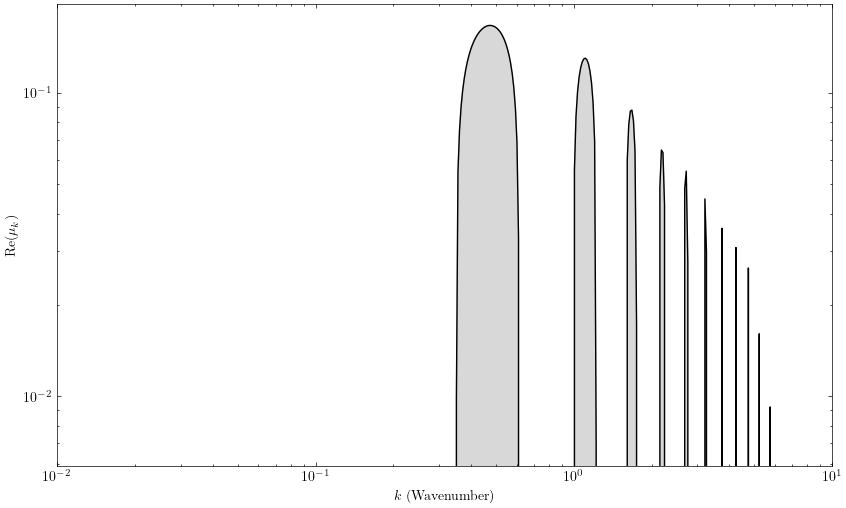

In [28]:
plt.figure(figsize=(10, 6))
plt.loglog(k_values, real_floquet_exponents, 'k-')
plt.fill_between(k_values, real_floquet_exponents, color='gray', alpha=0.3)
plt.xlabel(r'$k$ (Wavenumber)')
plt.xlim(0.01,10)
plt.ylabel(r'$\text{Re}(\mu_k)$')
plt.show()

# Floquet chart for $V=\lambda\phi^6$


The background solution is $\bar{\phi}\propto\text{cn}(\omega t,k)$

In [ ]:
from scipy.interpolate import interp1d

lambdam = 1
Mp = 1

def V(phi):
    return lambdam * phi**6

def DV(phi):
    return 6 * lambdam * phi**5

def D2V(phi):

    return 30 * lambdam * phi**4

def system_background(t, y):
    phi, pi = y
    dphi_dt = pi
    H_arg = ((pi**2) / 2 + V(phi)) / (3 * Mp**2)
    H = np.sqrt(max(0, H_arg))
    dpi_dt = -3 * H * pi - DV(phi)
    return [dphi_dt, dpi_dt]

phi_0 = phi_at_interseccion
pi_0 = pi_at_interseccion
y_0 = [phi_0, pi_0]
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 10000)

print("Resolviendo para el fondo")
sol_background = solve_ivp(system_background, t_span, y0=y_0, t_eval=t_eval, rtol=1e-6, atol=1e-8)
t_background = sol_background.t
phi_bar_sol = sol_background.y[0]
pi_bar_sol = sol_background.y[1]
print("Solución del fondo obtenida")

zero_crossings_pi = np.where(np.diff(np.sign(pi_bar_sol)))[0]

if len(zero_crossings_pi) < 2:
    raise ValueError("Not enough turning points found to determine a period. Extend t_span or adjust initial conditions.")

t_turning_points = []
for idx in zero_crossings_pi:
    if pi_bar_sol[idx+1] - pi_bar_sol[idx] == 0:
        t_interp = t_background[idx]
    else:
        t_interp = t_background[idx] - pi_bar_sol[idx] * (t_background[idx+1] - t_background[idx]) / (pi_bar_sol[idx+1] - pi_bar_sol[idx])
    t_turning_points.append(t_interp)

if len(t_turning_points) < 2:
    raise ValueError("Could not find enough turning points to define a period. Consider extending t_span.")

T_approx = 2 * (t_turning_points[1] - t_turning_points[0])
print(f"Approximate period of background solution (T_approx): {T_approx:.6f}")

phi_bar_interp = interp1d(t_background, phi_bar_sol, kind='cubic', fill_value="extrapolate")

def floquet_system(t, y, k_squared_over_a_squared, phi_bar_interp_func):
    chi, chi_dot = y
    phi_bar_at_t = phi_bar_interp_func(t)    
    coefficient = k_squared_over_a_squared + D2V(phi_bar_at_t) #Termino de w^2    
    dchi_dt = chi_dot
    dchi_dot_dt = -coefficient * chi
    return [dchi_dt, dchi_dot_dt]

k_values = np.logspace(-2, 1, 500)
real_floquet_exponents = []

print("Calculando exponentes de Floquet")
for k_val in k_values:
    k_squared_over_a_squared = k_val**2
    
    t0_floquet = t_background[0]
    t_span_floquet = (t0_floquet, t0_floquet + T_approx)
    y0_1 = [1.0, 0.0]
    sol_floquet_1 = solve_ivp(floquet_system, t_span_floquet, y0=y0_1, args=(k_squared_over_a_squared, phi_bar_interp), rtol=1e-8, atol=1e-10)
    final_state_1 = sol_floquet_1.y[:, -1]
    y0_2 = [0.0, 1.0]
    sol_floquet_2 = solve_ivp(floquet_system, t_span_floquet, y0=y0_2, args=(k_squared_over_a_squared, phi_bar_interp), rtol=1e-8, atol=1e-10)
    final_state_2 = sol_floquet_2.y[:, -1]
    Monodromy_Matrix = np.array([
        [final_state_1[0], final_state_2[0]],
        [final_state_1[1], final_state_2[1]]
    ])

    floquet_multipliers = np.linalg.eigvals(Monodromy_Matrix)

    #Tomar valores reales
    max_real_exponent = -np.inf
    for multiplier in floquet_multipliers:
        if np.abs(multiplier) < 1e-12: 
            nu = complex(-np.inf, 0) 
        else:
            nu = (1/T_approx) * np.log(multiplier)
        
        if np.real(nu) > max_real_exponent:
            max_real_exponent = np.real(nu)
            
    real_floquet_exponents.append(max_real_exponent)

print("Finalizado")

Resolviendo para el fondo
Solución del fondo obtenida
Approximate period of background solution (T_approx): 10.548043
Calculando exponentes de Floquet


C:\Users\MEGQ_\AppData\Local\Temp\ipykernel_9808\1201462816.py:103: RuntimeWarning: invalid value encountered in log
  nu = (1/T_approx) * np.log(multiplier)


Finalizado


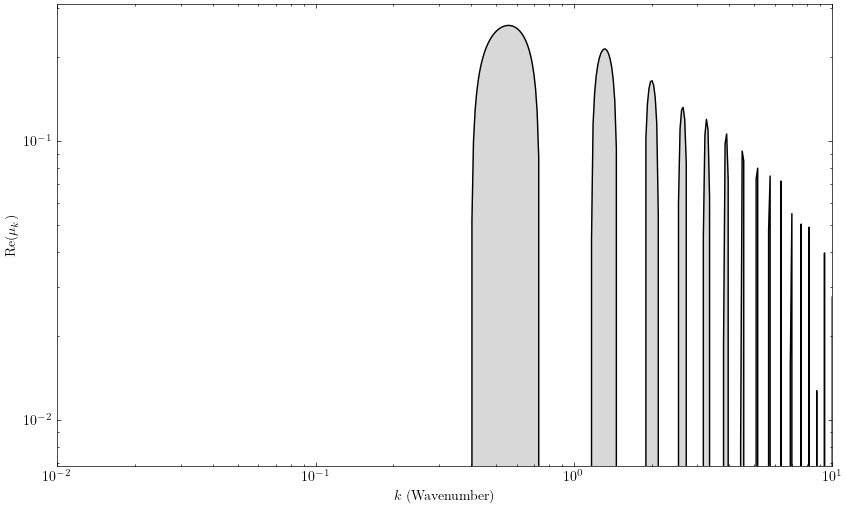

In [16]:
plt.figure(figsize=(10, 6))
plt.loglog(k_values, real_floquet_exponents, 'k-')
plt.fill_between(k_values, real_floquet_exponents, color='gray', alpha=0.3)
plt.xlabel(r'$k$ (Wavenumber)')
plt.xlim(0.01,10)
plt.ylabel(r'$\text{Re}(\mu_k)$')
plt.show()